# Prediction using Unsupervised ML
 ### Task : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

.

In [2]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 


from io import StringIO

from sklearn.preprocessing import LabelEncoder 

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Data Upload and Reading Process

data = pd.read_csv('iris.csv')

data.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

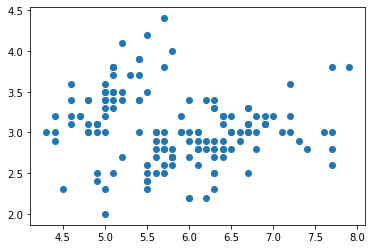

In [7]:
# Data Pre Visualization

plt.scatter(data.SepalLengthCm,data.SepalWidthCm )


In [15]:
# Data cleaning process

X= data.drop(['Species','Id'],axis = 1)
X.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


# Elbow Method


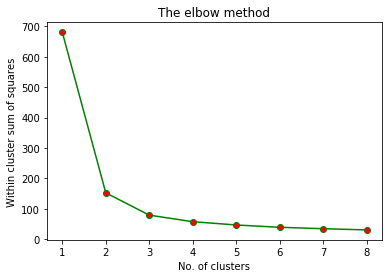

In [9]:
a = []
for i in range(1,9):
    m = KMeans(n_clusters = i, max_iter = 500, random_state = 1)
    m.fit(X)
    a.append(m.inertia_)

plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Within cluster sum of squares')
plt.plot(range(1,9), a, marker = 'o', color = 'green', markerfacecolor ='red')

## K Means Clustring Model Settings

In [10]:
model = KMeans(n_clusters = 3)
kmns = model.fit_predict(X)

In [11]:
kmns = pd.Series(kmns, name = 'cluster')
data1 = pd.concat([data,kmns],axis = 1)

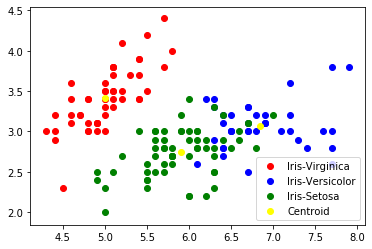

In [12]:
# Data Visualization

d1 = data1[data1['cluster'] == 1]
d2 = data1[data1['cluster'] == 2]
d3 = data1[data1['cluster'] == 0]

plt.scatter(d1.SepalLengthCm , d1.SepalWidthCm, color = 'red', label = 'Iris-Virginica')
plt.scatter(d2.SepalLengthCm , d2.SepalWidthCm, color = 'blue', label = 'Iris-Versicolor')
plt.scatter(d3.SepalLengthCm , d3.SepalWidthCm, color = 'green', label = 'Iris-Setosa')


plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'yellow', label = 'Centroid')


plt.legend()

In [13]:
silhouette_score(X ,data1.cluster)

0.5525919445499757